# Week 1 - Preprocessing

## Please run the cells of the notebook as you get to them while reading

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson on how to search for Python commands

Let's consider a few possible ways to learn about Python programming.  Let's suppose you want to learn how to produce a short summary of the information in your DataFrame.

1. Your **instructor** could provide the information.

You could be provided with a lesson about functions like info() and describe().  If you have a pandas DataFrame called df, then you can summarize its contents using df.info() or df.describe().  df.info() provides a list of column names with their counts and data types.  df.describe() will provide information such as the mean, min, max, standard deviation, and quantiles.  Thus:

In [2]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
25%,1.750000,4.750000
50%,2.500000,5.500000
75%,3.250000,6.250000
max,4.000000,7.000000


In this describe() result, we see that the two columns A and B each have four elements.  The means and other statistics are shown.

2. You could look up the information on **Google**.

If I Google the question "how do I briefly summarize the contents of a dataframe using Python," I receive the following link (among others), which discusses the describe() command mentioned above:

https://www.w3schools.com/python/pandas/ref_df_describe.asp

It also provide the complete usage information:

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

It explains that "percentiles" is set by default to [0.25, 0.5, 0.75] but we could change that.  Let's try it!  Since there are three intervals here rather than four, it might be more meaningful to ask about a 33rd and 67th percentile rather than 25, 50, and 75.  We can use 1/3 for 0.33 and 2/3 for 0.67 to get the exact percentile values.

In [3]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe(percentiles = [1/3, 2/3])

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
33.3%,2.000000,5.000000
50%,2.500000,5.500000
66.7%,3.000000,6.000000
max,4.000000,7.000000


Apparently, the 50% value (the median) stays even though we did not specifically request it.

3. You could look up the official **documentation**.

Now that we know we want the pandas describe() function, try Googling: pandas documentation describe.

Here is the general documentation page for pandas:

https://pandas.pydata.org/docs/index.html

Here is the specific page for the describe() function:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

When I look at this, it appears to be showing the most recent (currently 2.2) version of pandas; this is shown in the upper right corner.

4. You could also ask **ChatGPT**.

Let's try it.  ChatGPT, "how do I briefly summarize the contents of a dataframe using Python"

When I do this, ChatGPT mentions describe() among other options, but does not go into detail.  However, I could ask it.  ChatGPT, "tell me more about describe() in Python for summarizing dataframes."

Then, I get a good explanation of describe(), although it does not mention the percentiles option.  One advantage of using Google or the documentation in addition of ChatGPT is that these sources may provide interesting information that does not directly answer our question.  Thus, we might not have known about the various arguments, such as percentiles, if we only used ChatGPT.  A second issue is that ChatGPT sometimes hallucinates (it makes up information).  In general, by examining multiple sources - Google, documentation, and ChatGPT - we can get more information.

# 2. Weekly graph question

In Storytelling With Data, on page 1: examine the pie chart graph in the upper left corner of the graphs.  Please write a short explanation of the pros and cons of this graph.  What do you think of the choice of pie chart as a format?  The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?

The pie chart has following advantages/disadvantages:<br>
 *Advantages*
- Clearly shows what percentage of people express what level of interest.
- The legends make sense and denote what are the different categories people are choosing. 
<br>*Disadvantages*<br>
It has following disadvantages:
- does now show tha scale or quantities of samples falling into different categories

The choice of chart is pie chart is not the best one. because a Pie chart shows very high level distribution of samples. 
It has a ligeble color scheme and legend which is good. The title talks about servery results but does not indicate what the survey is all about. 

If I were to recreate the graph I would choose a bar chart that would also show how many samples and what percentage of samples fall into each survey response categories with a clearer Title that shows what the survey is all about .


# 3. Homework - Bank Customers

I will begin by creating a file for you to analyze.  I will show you all of the steps I used to create it.  Please run this code in order to create and save a file about bank customers.

### The numbered problems are for you to solve.

In [4]:
num_customers = 100
np.random.seed(0)

In [5]:
df_bank = pd.DataFrame(columns = ["CustomerID"])

In [6]:
df_bank["CustomerID"] = [str(x) for x in np.arange(num_customers)]

In [7]:
start = datetime(1950, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_customers)
df_bank["BirthDate"] = start + pd.to_timedelta(random_days, unit='D')
df_bank["BirthDate"] = df_bank["BirthDate"].dt.strftime('%Y-%m-%d')

In [8]:
def make_ssn_string(num):
    ssn_str = f'{num:09}'
    return ssn_str[0:3] + "-" + ssn_str[3:5] + "-" + ssn_str[5:9]
ssn_vector_func = np.vectorize(make_ssn_string)
df_bank["SSN"] = ssn_vector_func(np.random.randint(0, 999999999, size = num_customers))

In [9]:
df_bank["AccountID"] = np.random.randint(0, num_customers, size = num_customers)

In [10]:
random_days = np.random.randint(0, 365 * 80, size = num_customers)
df_bank["AccountOpened"] = (pd.to_datetime(df_bank["BirthDate"]) + pd.to_timedelta(random_days, unit='D')).dt.strftime('%Y-%m-%d')

In [11]:
df_bank.loc[0, "BirthDate"] = "1980"
df_bank.loc[1, "BirthDate"] = "no date"

In [12]:
df_bank.loc[2, "AccountID"] = np.nan

In [13]:
df_bank["AccountType"] = np.random.choice(["checking", "savings", "cd"], size = num_customers)

Load the bank_customers.csv file.  (There is no practical reason to save it, then load it - we're just demonstrating how this would be done.)
I am calling the loaded df by a new name, df_bank_loaded, to make clear why it's not the same variable as the old df.  Of course, in actuality the two contain the exact same data!  But it's good to get in the habit of naming things carefully.

In [14]:
df_bank.loc[num_customers - 1] = df.loc[0]
df_bank.to_csv("bank_customers.csv", index=False)

In [15]:
df_bank_loaded = pd.read_csv("bank_customers.csv")

1. Use describe() and info() to analyze the data.   Also, look at the first few rows.

Suggested Google Search or ChatGPT prompt: "how do I use the describe function in python"

Example Google result: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [16]:
# The first few rows
df_bank_loaded.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


In [17]:
df_bank_loaded.describe()

,CustomerID,AccountID
count,99.000000,98.000000
mean,49.000000,46.551020
std,28.722813,27.679358
min,0.000000,0.000000
25%,24.500000,25.500000
50%,49.000000,42.000000
75%,73.500000,71.000000
max,98.000000,97.000000


In [18]:
df_bank_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     99 non-null     float64
 1   BirthDate      99 non-null     object 
 2   SSN            99 non-null     object 
 3   AccountID      98 non-null     float64
 4   AccountOpened  99 non-null     object 
 5   AccountType    99 non-null     object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


If you used describe() and info(), you now know that BirthDate and AccountOpened are strings.  But we want them to be dates.  Let's convert them to dates (or Timestamps in pandas).  When we try this, we get a ValueError.

In [19]:
try:
    df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for BirthDate: {e}")

ValueError for BirthDate: time data "1980" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [20]:
try:
    df_bank_loaded["AccountOpened"] = pd.to_datetime(df_bank_loaded["AccountOpened"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")

It worked!


The simple way to fix this is to remove the rows that have bad dates for BirthDate.  I Googled:

"How to remove rows from a dataframe that have poorly formatted dates using python"

https://stackoverflow.com/questions/21556744/pandas-remove-rows-whose-date-does-not-follow-specified-format

This recommends that I verify that the date is a string of length 10, because YYYY-MM-DD has that length:

df1\[df1.BirthDate.str.len() !=10]

In [21]:
len(df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10])

97

In [22]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


Now we can make this permanent, creating a new DataFrame df_bank_datefix.
I am making a copy in order to ensure that df_bank_datefix is a new DataFrame rather than being a slice of the old one.

In [23]:
df_bank_datefix = df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10].copy()

Test again:

In [24]:
try:
    df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError: {e}")

It worked!


2. To check that it worked, use a summary function that will tell you if the BirthDate field is now a datetime type

In [25]:
df_bank_datefix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 2 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     97 non-null     float64       
 1   BirthDate      97 non-null     datetime64[ns]
 2   SSN            97 non-null     object        
 3   AccountID      96 non-null     float64       
 4   AccountOpened  97 non-null     datetime64[ns]
 5   AccountType    97 non-null     object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 5.3+ KB


3. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?"

This page gives an answer.  Unfortunately, it took my request too literally: it tells me only if there are any, and not which rows have them.  On reflection, that's not really what I want - I think I asked the wrong question.  I want to see the rows, not just _whether_ there are any.

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

ChatGPT likewise doesn't give the answer I want - because I asked the wrong question.

Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"

This page gives an answer:

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

ChatGPT also gives a good answer.  I recommend looking at both of them!

Now try it on your own:

Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"

Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"

In [26]:
# Check for rows with NaN values
print(df_bank_datefix.isna().any(axis=1).sum())
df_bank_datefix[df_bank_datefix.isna().any(axis=1)]
# Remove rows with NaN values in AccountID
df_bank_datefix = df_bank_datefix[df_bank_datefix["AccountID"].notna()]
df_bank_datefix[df_bank_datefix.isna().any(axis=1)]

1


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType


4. Find out if there are any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"

Again, Google provides me with a page that addresses the question:

https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python"

This leads me to the following documentation.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [27]:
df_bank_datefix_dedup = df_bank_datefix.duplicated()


In [28]:
df_bank_datefix_dup_rows = df_bank_datefix_dedup[df_bank_datefix_dedup == True]

In [29]:
len(df_bank_datefix_dup_rows)

0

The length of series *df_bank_datefix_dup_rows* is 0. so there are no duplicates in this dataframe .

5. Check whether the customers all have unique AccountIDs.  If not, provide the first example of a non-unique AccountId.

Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"

By the way: why didn't I ask the question "how can I check whether the customers all have unique AccountIDs"?

The problem would be that Google and ChatGPT don't know what "customers" you are talking about.  It's important to understand that the AccountIDs are a column of a DataFrame, and as such they are a Series.  Therefore, we should use the correct vocabulary and ask about a Series.  If you mess up and ask about a "list" instead of a Series, you _might_ get an answer that still works.  But it's better to get the vocabularly right.

It's important to add "in python" because this task could be performed in many languages.

ChatGPT gave me this suggestion: data[data.isin(data[data.duplicated()])].iloc[0]
However, ChatGPT did not explain how this code worked and even claimed (falsely) that it was going to use the value_counts() function in the solution.  So although the code is correct, I personally found ChatGPT's answer very confusing.  You could, perhaps, ask ChatGPT to explain further how this code works.

ChatGPT, "How does this code work: data[data.isin(data[data.duplicated()])].iloc[0]"

On the other hand, Google leads me to the documentation for the duplicated() function:

https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)].

So as usual, I'd suggest that a combination of Google, documentation, and ChatGPT will give you the best information.

In [30]:
df_bank_datefix_accountid = df_bank_datefix['AccountID'].copy()
# Look into df.unique method 

df_bank_datefix_accountid_dups = df_bank_datefix_accountid[df_bank_datefix_accountid.duplicated("first") == True]
print((df_bank_datefix_accountid_dups).iloc[0])
len(df_bank_datefix_accountid_dups)

56.0


33

First example of Accountid being duplicated is AccountId = 56
There are 33 AccountIds duplicated in the dataset.

6. Count how many distinct AccountIDs there are.

Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"

This time Google provides me with a page that's specifically made to answer this question:

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [31]:
distinct_accoutIDs = len(pd.unique(df_bank_datefix['AccountID']))
print(distinct_accoutIDs)

63


There are 64 Unique AccountIDs in the customer dataset

7. Remove the duplicate AccountIDs so that each AccountID appears only once.

This will involve using data.duplicated() but this time without keep = False.  We don't want to drop all duplicates; we want to leave one example of each value.

In [32]:
df_bank_datefix_rem_dup_acctid_keep_first = df_bank_datefix.drop_duplicates(subset=['AccountID'])
df_bank_datefix_rem_dup_acctid_keep_first

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings
...,...,...,...,...,...,...
88,88.0,1962-02-07,327-09-3267,97.0,1989-10-03,cd
90,90.0,1969-06-18,395-31-7064,34.0,2010-12-28,checking
94,94.0,1969-03-14,958-12-8308,5.0,2037-04-03,savings
95,95.0,1975-09-23,607-97-1651,36.0,2011-07-24,checking


In [33]:
df_bank_datefix_accountid.drop_duplicates(inplace=True)
df_bank_datefix_accountid

3     86.0
4     77.0
5     75.0
6     56.0
7     16.0
      ... 
88    97.0
90    34.0
94     5.0
95    36.0
96     0.0
Name: AccountID, Length: 63, dtype: float64

8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.)
Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)

Suggested Google search or ChatGPT prompt: "how can I find out the mean, median, and mode of a pandas Series"

In [34]:

today = datetime.now()

df_bank_datefix['age'] = today.year - df_bank_datefix["BirthDate"].dt.year - (
    (today.month < df_bank_datefix["BirthDate"].dt.month) | 
    ((today.month == df_bank_datefix["BirthDate"].dt.month) & (today.day < df_bank_datefix["BirthDate"].dt.day))
).astype(int)

age_mean_value = df_bank_datefix['age'].mean()
print(age_mean_value) # Output: 3.375
age_median_value = df_bank_datefix['age'].median()
print(age_median_value) # Output: 3.5
age_mode_value = df_bank_datefix['age'].mode()
print(age_mode_value)
age_max_value = df_bank_datefix['age'].max()
print(age_max_value)
age_min_value = df_bank_datefix['age'].min()
print(age_min_value)




34.416666666666664
33.0
0      2
1      7
2     10
3     21
4     23
5     24
6     28
7     33
8     34
9     36
10    47
11    56
Name: age, dtype: int64
73
1


There are outlier ages that are age = 1 and age = 73<br>
The mean of ages is 34.45 rounded down to next age 35<br>
The median of age column is 33<br>
The mode values were 24 and 33 . The most frequently occuring ages in the dataset

9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.

In [35]:
one_hot = pd.get_dummies(df_bank_datefix["AccountType"])
df_bank_datefix = df_bank_datefix.join(one_hot)
df_bank_datefix.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,age,cd,checking,savings
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,True,False,False
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,True,False,False
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17,False,True,False
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,50,False,False,True
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,9,False,False,True


Now, change the cd, checking, and savings columns into integers.

In [36]:
df_bank_datefix['cd'] = df_bank_datefix['cd'].astype(int)
df_bank_datefix['checking'] = df_bank_datefix['checking'].astype(int)
df_bank_datefix['savings'] = df_bank_datefix['savings'].astype(int)
df_bank_datefix.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,age,cd,checking,savings
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd,21,1,0,0
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd,39,1,0,0
5,5.0,2008-02-29,671-43-0485,75.0,2025-05-03,checking,17,0,1,0
6,6.0,1975-04-05,288-62-9296,56.0,2048-09-21,savings,50,0,0,1
7,7.0,2016-06-18,593-49-1249,16.0,2087-07-24,savings,9,0,0,1


10. Are there any other data values that do not seem right?  If not, give an example?

I don't think Google or ChatGPT alone will help you here.  To answer the question, look at the columns and think about what relationships they should have with each other.  For example, it seems reasonable to expect that BirthDate would be no earlier than 120 years ago (it's unlikely that a customer would be this old.)  Now we can ask Google:

"How can I find out how long ago a pandas date is"

Google provides this helpful link, although it is not exactly the solution - you'll have to work with it a bit:

https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

If you check, I think you'll find that all dates are more recent than 120 years ago.  What about the AccountOpened columns?  I see some obviously wrong dates there just by looking at the first few rows.

Along those same lines, are there any birth dates that are too recent?  Do we think that any two year olds will have opened bank accounts?  How common do you think this is in real life?  How common is it in our data set?  Can you detect the two year olds opening bank accounts using just one column, or do you need two columns?

In [37]:
df_bank_datefix['AccountOpenedYears'] = today.year - df_bank_datefix["AccountOpened"].dt.year - (
    (today.month < df_bank_datefix["AccountOpened"].dt.month) | 
    ((today.month == df_bank_datefix["AccountOpened"].dt.month) & (today.day < df_bank_datefix["AccountOpened"].dt.day))
).astype(int)
df_invalid_accounts = df_bank_datefix[df_bank_datefix['AccountID'].isna()]
print("These are invalid accounts")
print(df_invalid_accounts)
df_minor_accounts = df_bank_datefix[df_bank_datefix['age'] < 18]
print("These are minor accounts")
print(df_minor_accounts)
df_ghost_accounts = df_bank_datefix[df_bank_datefix['age'] < df_bank_datefix['AccountOpenedYears']]
print("These are accounts created before the customer was born")
print(df_ghost_accounts)
df_future_accounts = df_bank_datefix[df_bank_datefix['AccountOpenedYears'] < 0]
print("These are accounts with an AccountOpened date in the future")
print(df_future_accounts)

These are invalid accounts
Empty DataFrame
Columns: [CustomerID, BirthDate, SSN, AccountID, AccountOpened, AccountType, age, cd, checking, savings, AccountOpenedYears]
Index: []
These are minor accounts
    CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType  \
5          5.0 2008-02-29  671-43-0485       75.0    2025-05-03    checking   
7          7.0 2016-06-18  593-49-1249       16.0    2087-07-24     savings   
9          9.0 2010-12-10  844-31-4793       29.0    2048-06-01    checking   
21        21.0 2016-02-16  972-63-5997       13.0    2077-03-09          cd   
23        23.0 2021-12-11  939-09-9746       56.0    2071-09-01          cd   
37        37.0 2017-07-23  991-68-0187       88.0    2094-12-17    checking   
44        44.0 2018-06-12  275-51-1419       86.0    2095-12-10    checking   
45        45.0 2015-04-10  931-24-3971       61.0    2078-11-23     savings   
49        49.0 2007-10-28  494-36-1748       32.0    2069-08-14    checking   
51     

11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.

I asked Google and ChatGPT: "How can I plot dates vs. dates in Matplotlib".  This gave me a hard time at first - I had to tell ChatGPT it was giving me the wrong information because it tried to plot dates vs. numbers.  Eventually, I found out that you plot dates vs. dates in the same way you'd plot numbers vs. numbers.

Think in terms of Storytelling With Data to plot these as best you can.  Once you've seen the result, try to think of the best way to plot the data so as to show the user what you want them to see.  Title the graph so as to display the lesson that you want the user to take away.
Here are some options for the axes:

1. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the date they open the account.
2. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the age in years at which they open the account.
3. A scatter or line plot: On the x-axis, they year (integer) they are born.  On the y-axis, the age in years at which they open the account.
4. A histogram: on the x-axis, the age at which they open the account.

Here is an example:

Text(0.5, 1.0, 'Scatter plot of Birth Date vs. Account Opened')

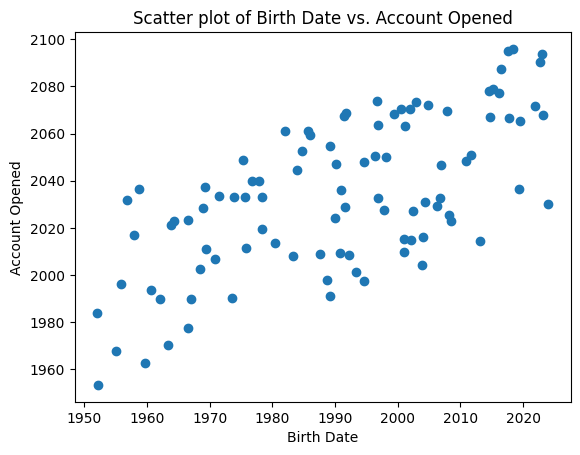

In [38]:
import matplotlib.pyplot as plt

ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"
ax.scatter(df_bank_datefix["BirthDate"], df_bank_datefix["AccountOpened"]) # create a scatter plot based on these two dates
ax.set_ylabel("Account Opened") # label the y axis
ax.set_xlabel("Birth Date") # label the x axis
ax.set_title("Scatter plot of Birth Date vs. Account Opened")

Text(0.5, 1.0, 'Scatter plot of Birth Date vs. Account Opened at Age')

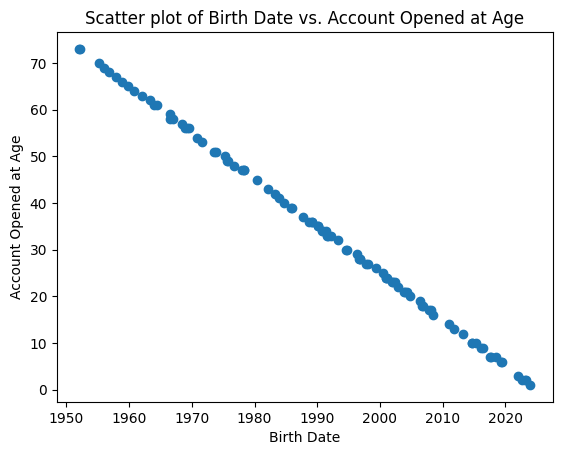

In [39]:
import matplotlib.pyplot as plt

ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"
ax.scatter(df_bank_datefix["BirthDate"], df_bank_datefix["age"]) 
ax.set_ylabel("Account Opened at Age") # label the y axis
ax.set_xlabel("Birth Date") # label the x axis
ax.set_title("Scatter plot of Birth Date vs. Account Opened at Age")

This Scatter plot shows that Since 1950 Customers are opening account at an earlier age , year after year.

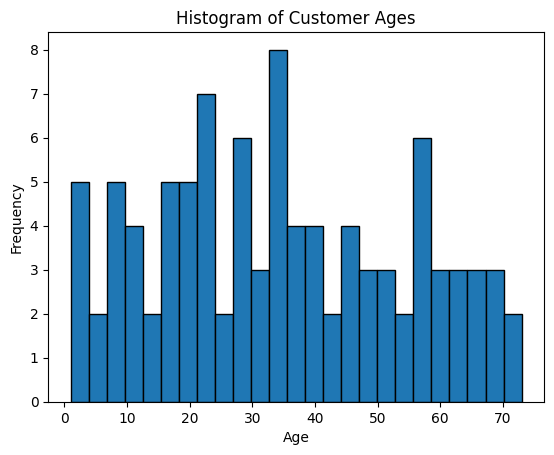

In [40]:
import matplotlib.pyplot as plt

plt.hist(df_bank_datefix['age'], bins=25, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Ages')
plt.show()

The histogram of customer ages at which they opened an account shows many customers opened account between 15 and 40 years of age.

# 4. Storytelling With Data graph

Choose any graph in the Introduction of Storytelling With Data.  Using matplotlib to reproduce it in a rough way.  I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph.  However, if you're excited about learning to use matplotlib, this is a good way to do that.  You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

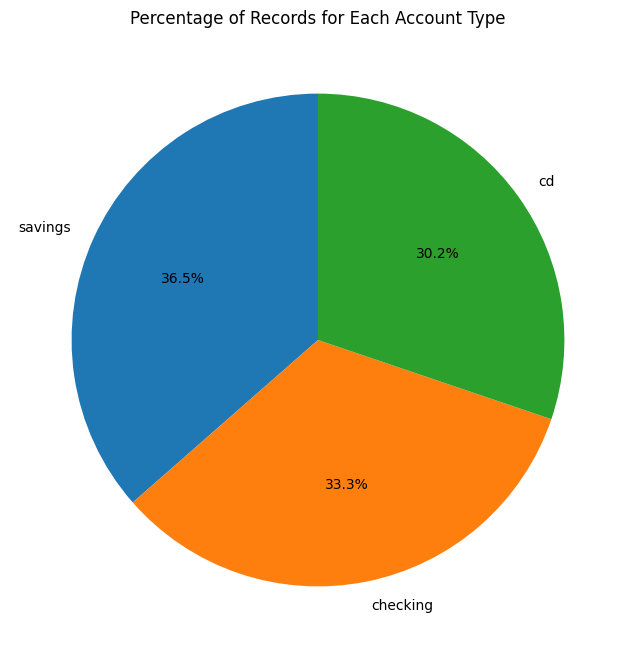

In [41]:

account_type_counts = df_bank_datefix['AccountType'].value_counts()
account_type_percentages = account_type_counts / len(df_bank_datefix) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(account_type_percentages, labels=account_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Records for Each Account Type')
plt.show()